# Advertising Sales Channel prediction

Sales channel prediction project

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [1]:
#importing required liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df=pd.DataFrame(data=df)

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#checking shape of dataset
df.shape

(200, 5)

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

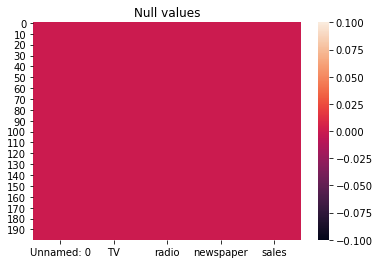

In [8]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# EDA And Data Visualisation

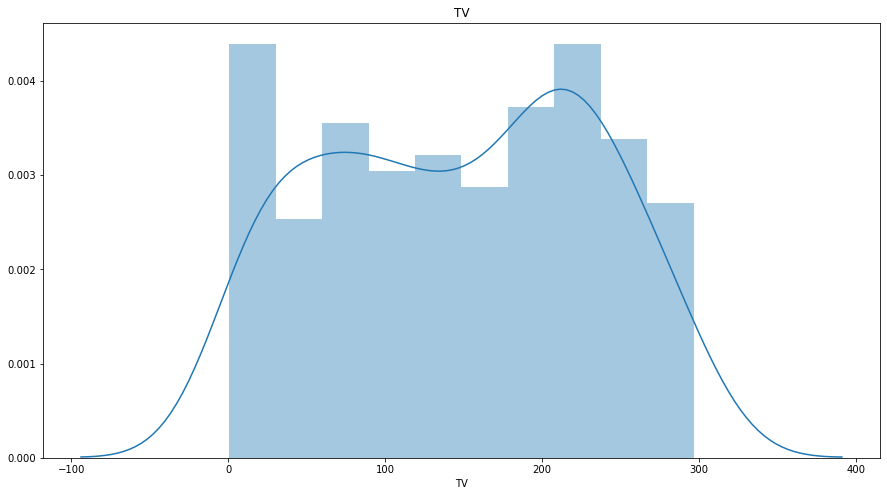

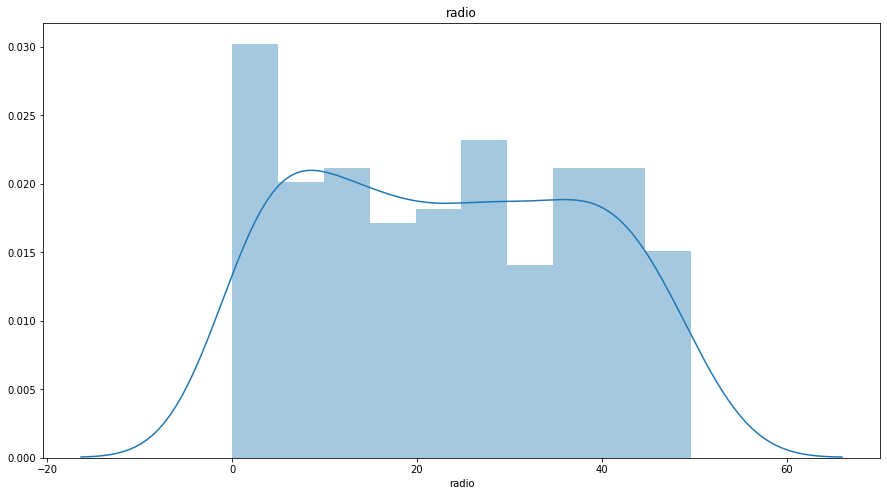

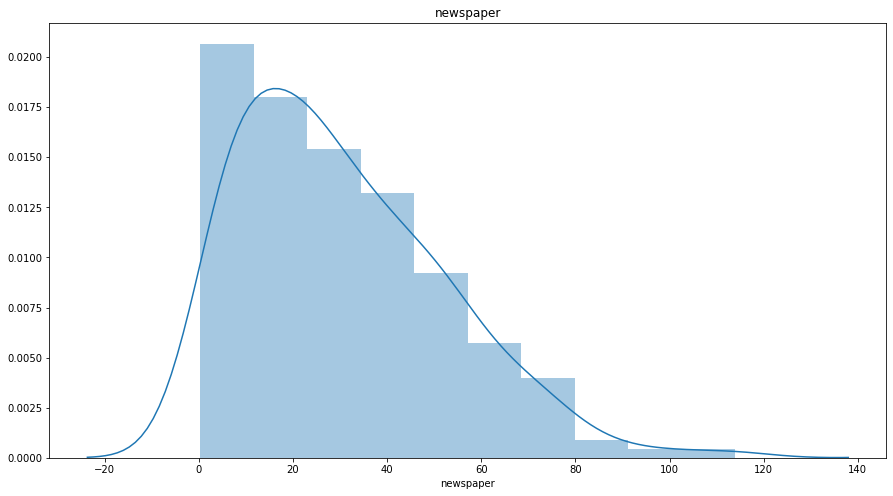

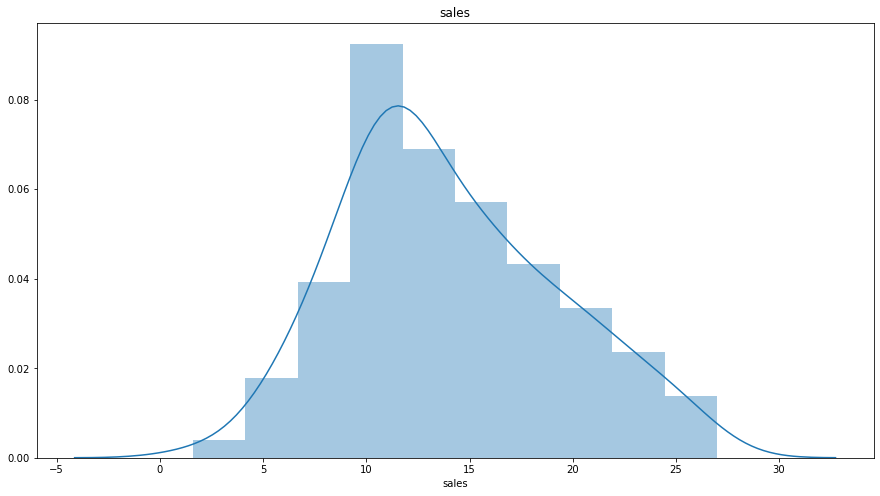

In [11]:
for a in df.columns[1:]:
    plt.figure(figsize=(15,8))
    sns.distplot(df[a],bins=10)
    plt.title(a)
    plt.show()

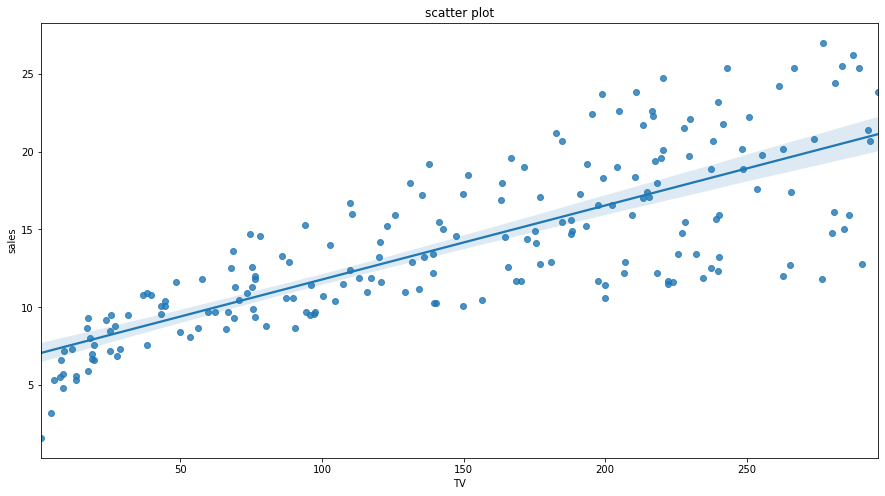

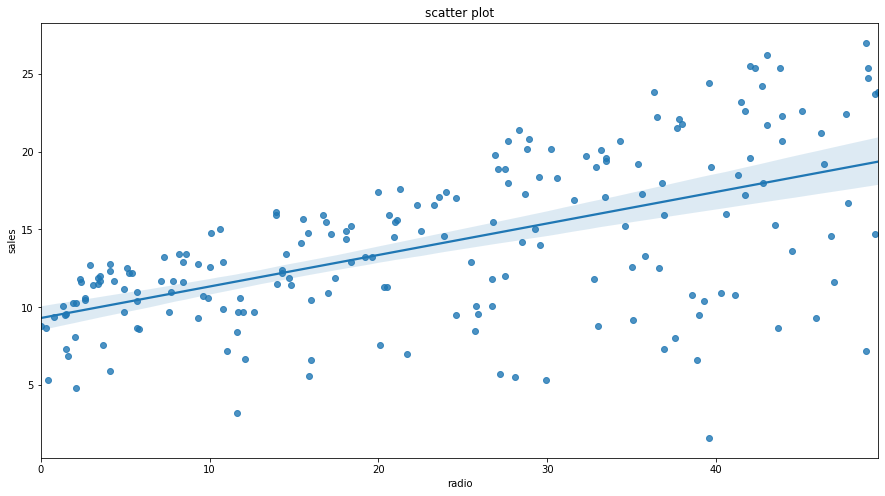

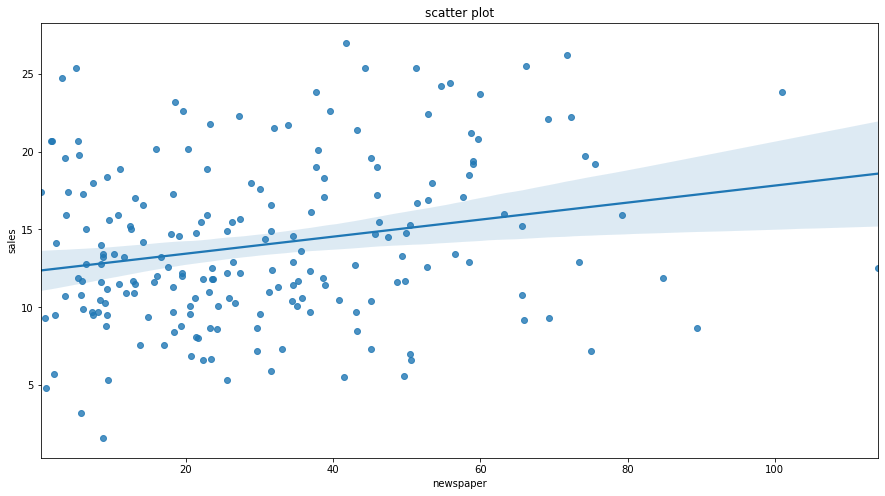

In [12]:
for a in df.columns[1:-1]:
    plt.figure(figsize=(15,8))
    sns.regplot(df[a],df['sales'])
    plt.title('scatter plot')
    plt.xlabel(a)
    plt.ylabel('sales')
    plt.show()

    

1>the plot of tv and sales have linear


2>the plot of radio and sales is very much spreaded not in linear

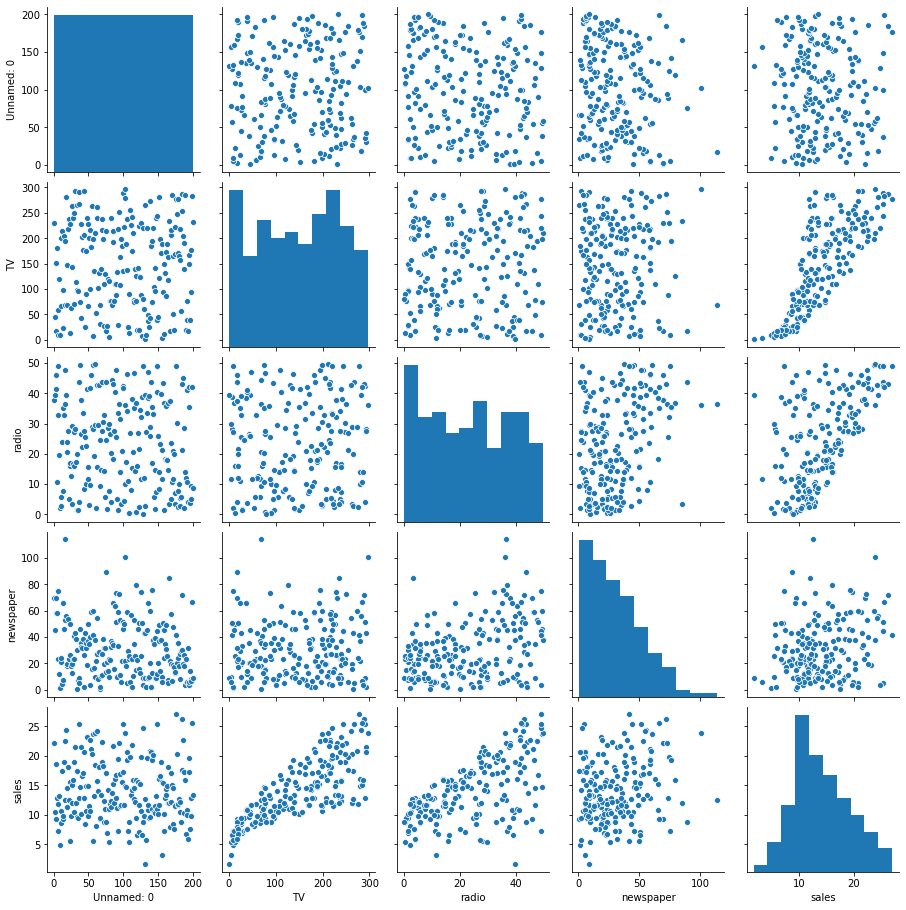

In [13]:
sns.pairplot(df)

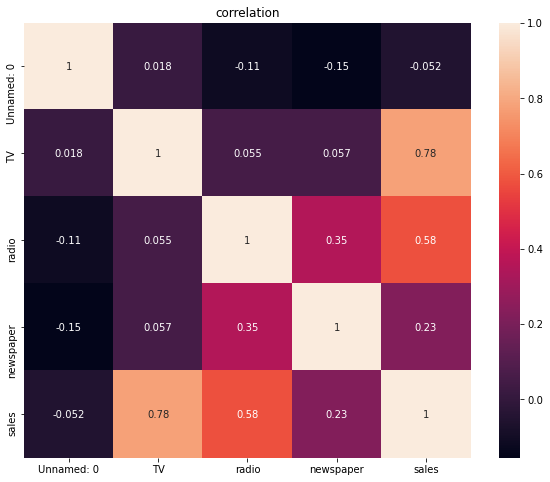

In [14]:
#now checking realtion by using heatmap
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.title('correlation')
plt.show()

newspaper have the lowest correlation with sales 

TV has also very low correlation with radio and newspaper 

sales have highly correalton with TV and Radio

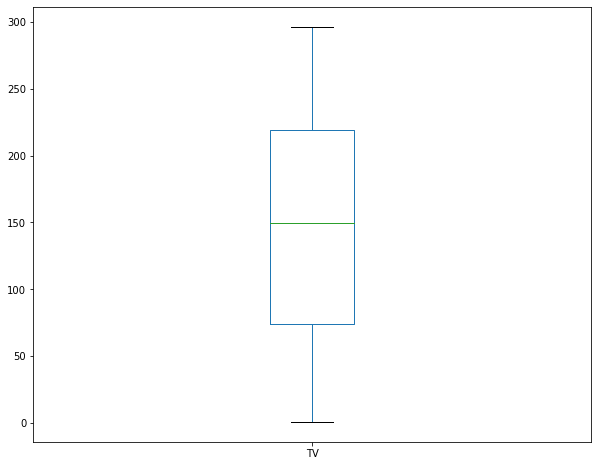

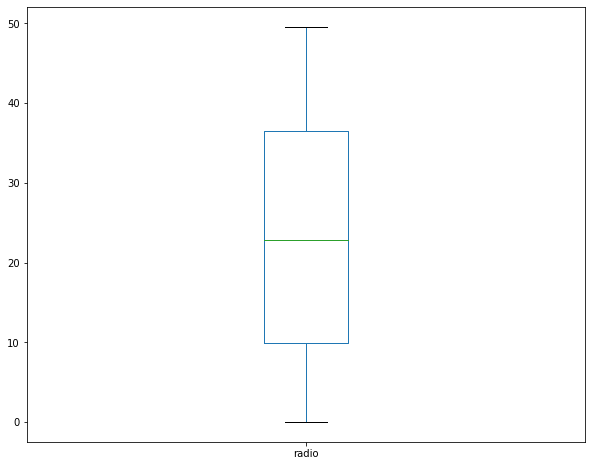

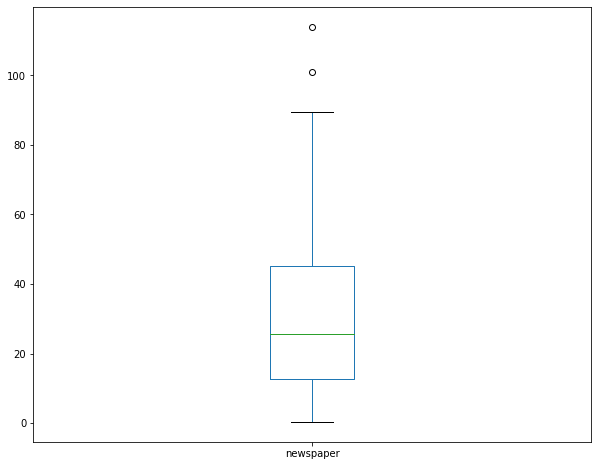

In [15]:
#checking outliers
for i in df.columns[1:-1]:
    plt.figure(figsize=(10,8))
    df[i].plot.box()

as per above boxplot there is no outliers in TV and radio but newspaper have outliers which can be ignored

In [16]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [17]:
df_new=['TV','radio','newspaper']


# feature engineering

In [18]:
X=df[df_new]
y=df['sales']

In [19]:
#checking best random state
maxr2score=0
maxRS=0


for i in range(1,400):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=i)
    LR=LinearRegression()
    LR.fit(X_train,y_train)
    predrf=LR.predict(X_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2score:
        maxr2score=r2
        maxRS=i
        
print('R2 score is: ',maxr2score,'random state is:',maxRS)        

R2 score is:  0.9376607659997034 random state is: 367


In [20]:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=367)


In [21]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()


In [22]:
models=[LR,dt,rf]

In [23]:
for i in models:
    print(i)
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    print(r2_score(y_test,pre))
    print(mean_squared_error(y_test,pre))

LinearRegression()
0.9376607659997034
1.7768463424389644
DecisionTreeRegressor()
0.9653623253189775
0.987272727272727
RandomForestRegressor()
0.9799087469117084
0.5726581363636373


# Cross validation score

In [24]:
for i in models:
    cv=cross_val_score(i,X,y,cv=5)
    print('validation score is:',i,'model is:',cv.mean())
    print('')

validation score is: LinearRegression() model is: 0.8871063495438436

validation score is: DecisionTreeRegressor() model is: 0.9571351829502841

validation score is: RandomForestRegressor() model is: 0.9757168181424609



BEST FIT MODEL IS :

# HYPERPARAMETER TUNNING

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid={'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']}


In [29]:
GCV=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [30]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [33]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(X_train, y_train)
predrfr = rfr.predict(X_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

0.9802949220663192
0.561651040719699


In [36]:
cv=cross_val_score(rfr,X,y,cv=5)
print('CV Score for randomforest model is:',cv.mean())

CV Score for randomforest model is: 0.9764710117511296


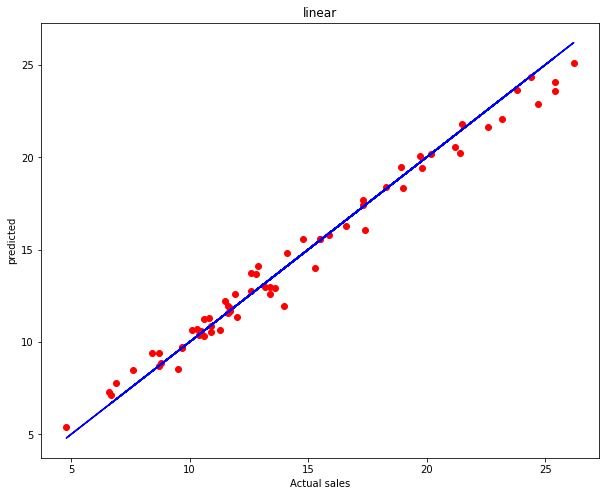

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=predrfr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales')
plt.ylabel('predicted')
plt.title('linear')
plt.show()

In [39]:
import pickle

In [40]:
f='Advertising.pkl'
pickle.dump(rfr,open(f,'wb'))

In [44]:
model_new=pickle.load(open('Advertising.pkl','rb'))
final=model_new.score(X_test,y_test)
print(final)

0.9802949220663192
